# NN

## Prepare execution

### Imports

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

2025-07-01 17:44:55.721796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751384695.735722   12162 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751384695.740344   12162 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751384695.751440   12162 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751384695.751457   12162 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751384695.751459   12162 computation_placer.cc:177] computation placer alr

### Load both datasets

In [5]:
train_df = pd.read_csv('../data/loan_data_prepared_train.csv')
test_df = pd.read_csv('../data/loan_data_prepared_test.csv')

### Goal Column

In [6]:
target_col = 'loan_status'

### Split X and Y

In [23]:
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

## Train Model

### Create NN model

In [51]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Garder sigmoid pour la sortie (classification binaire)
])

/home/ced/src/ml-models-comparison/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile model

In [52]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Fit model

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.8514 - loss: 0.3313
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9076 - loss: 0.2057
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.9100 - loss: 0.1956
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.9113 - loss: 0.1912
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9159 - loss: 0.1872
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.9171 - loss: 0.1847
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9183 - loss: 0.1807
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9195 - loss: 0.1782
Epoch 9/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.9164 - loss: 0.1801
Epoch 10/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9185 - loss: 0.1788
Epoch 11/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9166 - loss: 0.1822
Epoch 12/30


## Test

### Predict output

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int).flatten()

### Evaluate model on test data

In [ ]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_binary), 3))

### Display Confusion Matrix

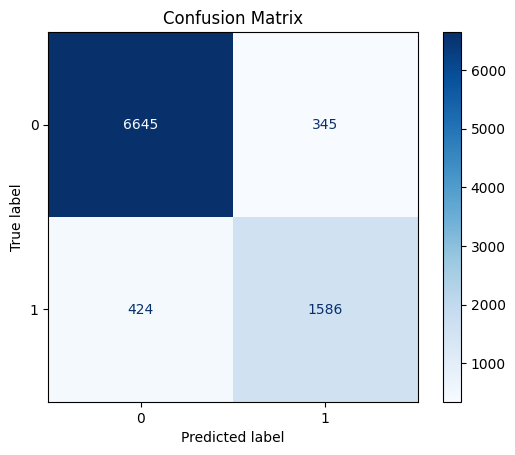

In [44]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()